### Method 1

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read The Dataset

In [3]:
df= pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


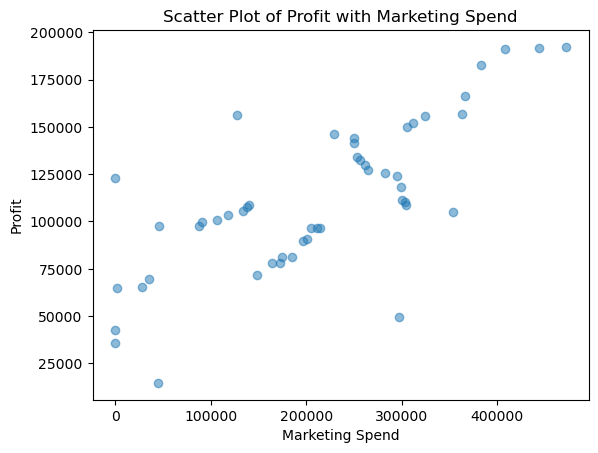

In [6]:
plt.scatter(df['Marketing Spend'],df['Profit'],alpha=0.5)
plt.title('Scatter Plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

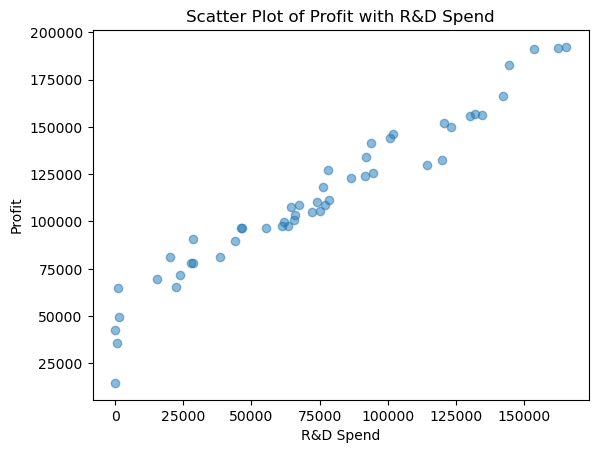

In [7]:
plt.scatter(df['R&D Spend'],df['Profit'],alpha=0.5)
plt.title('Scatter Plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

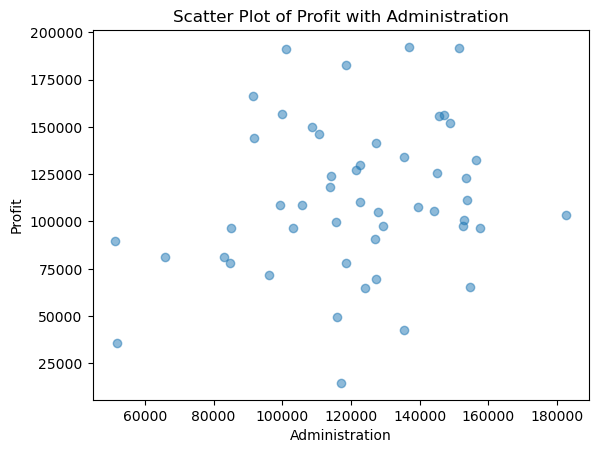

In [8]:
plt.scatter(df['Administration'],df['Profit'],alpha=0.5)
plt.title('Scatter Plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

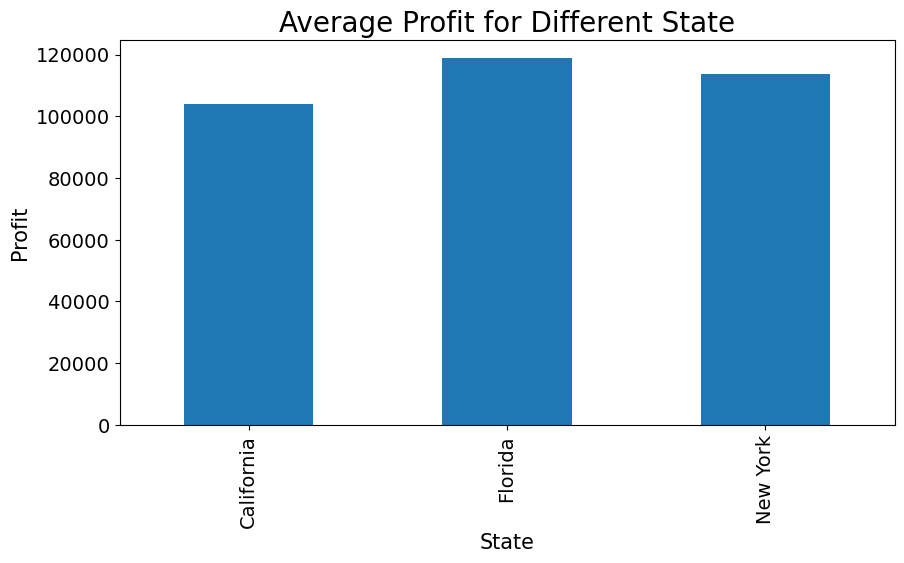

In [9]:
### Average Profit by Each State
state=df.groupby(['State'])['Profit'].mean().plot.bar(figsize =(10,5),fontsize=14)
state.set_title('Average Profit for Different State',fontsize=20)
state.set_xlabel("State",fontsize=15)
state.set_ylabel("Profit",fontsize=15)

In [10]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [11]:
# Create Dummy Variable for State
df['NewYork_State']=np.where(df['State']=='New York',1,0)
df['California_State']=np.where(df['State']=='California',1,0)
df['Florida_State']=np.where(df['State']=='Florida',1,0)
# Drop the Original State Column
df.drop(columns=['State'],axis=1,inplace=True)

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [13]:
X=df.drop(columns='Profit')

In [14]:
X.head()

,R&D Spend,Administration,Marketing Spend,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [15]:
y=df['Profit']

#### Split the Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 6), (10, 6), (40,), (10,))

### Transforming Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [20]:
X_train[0:10]

array([[ 0.34202149,  0.22787678,  0.12425038, -0.69388867, -0.69388867,
         1.36277029],
       [ 1.36207849, -1.0974737 ,  1.14990688, -0.69388867, -0.69388867,
         1.36277029],
       [-0.71081297, -2.5770186 , -0.34136825, -0.69388867,  1.44115338,
        -0.73379939],
       [ 0.90611438,  1.0172367 ,  0.66890185,  1.44115338, -0.69388867,
        -0.73379939],
       [ 1.40997088, -0.09115403,  1.30006861,  1.44115338, -0.69388867,
        -0.73379939],
       [ 1.20367103,  0.96116332, -0.95248784, -0.69388867,  1.44115338,
        -0.73379939],
       [-1.05285826, -1.34392538, -0.62843389, -0.69388867, -0.69388867,
         1.36277029],
       [-1.61480906, -0.19649414,  0.54106768, -0.69388867, -0.69388867,
         1.36277029],
       [-1.642623  ,  0.52691442, -2.07854935, -0.69388867,  1.44115338,
        -0.73379939],
       [ 0.77885123,  0.05437051,  0.2294954 ,  1.44115338, -0.69388867,
        -0.73379939]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

####  Prediction for Test Data and Calculate Metrics

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
yhat_train=model.predict(X_train)

In [25]:
math.sqrt(mean_squared_error(yhat_train,y_train))

8927.489013300054

In [26]:
r2_score(yhat_train,y_train)

0.9514544370272751

In [27]:
yhat_test=model.predict(X_test)

In [28]:
math.sqrt(mean_squared_error(yhat_test,y_test))

23224.213500941172

In [29]:
r2_score(yhat_test,y_test)

0.6448317486080124

### Method 2

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


#### Ordinary Least Square

In [31]:
import statsmodels.formula.api as smf
model_df= smf.ols('Profit~Q("R&D Spend")+Administration+Q("Marketing Spend")+ NewYork_State+California_State+Florida_State', data=df).fit()

In [32]:
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.34e-27
Time:                        13:00:55   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
Q("R&D Spend")           0.8060      0.046     17.369      0.000       0.712       0.900
Administration          -0.0270      0.052     -0.517      0.608      -0.132       0.078
Q("Marketing Spend")     0.0270      0.017      1.574      0.123      -0.008       0.062
NewYork_State         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
California_State      1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida_State         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.61e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
model_df.resid.head()

0    -128.741365
1    2720.739894
2    8774.203265
3    9317.013809
4   -6089.193819
dtype: float64

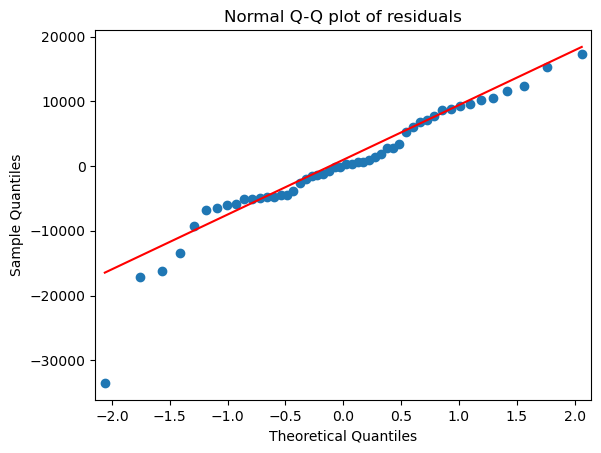

In [34]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_df.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
model_df_influence = model_df.get_influence()
(c, _) = model_df_influence.cooks_distance

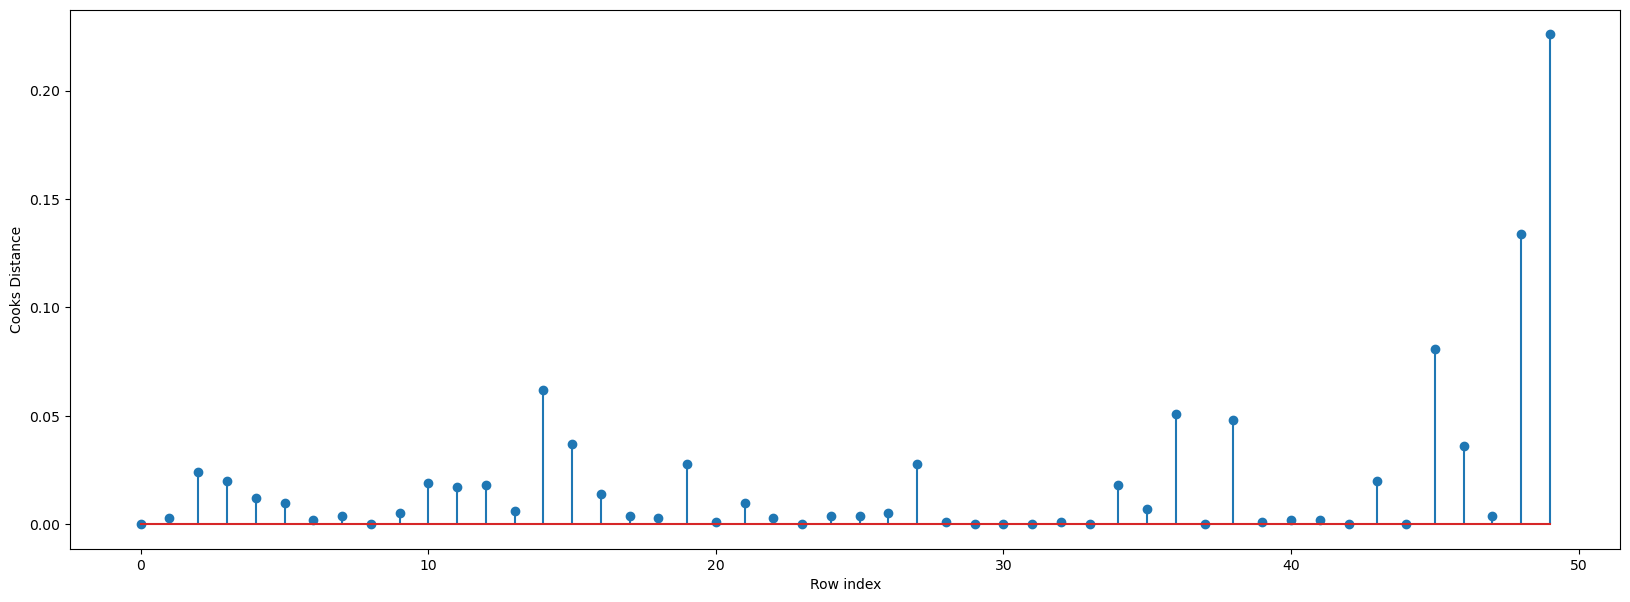

In [36]:
#Plot the Influencers Values using Stem Plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
df_1 = pd.read_csv("50_Startups.csv")

#### Removing Influencial Points

In [38]:
df1=df_1.drop(df_1.index[[45,48,49]],axis=0).reset_index()

In [39]:
df1=df1.drop(['index'],axis=1)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        47 non-null     float64
 1   Administration   47 non-null     float64
 2   Marketing Spend  47 non-null     float64
 3   State            47 non-null     object 
 4   Profit           47 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [41]:
# Create Dummy Variable for State
df1['NewYork_State']=np.where(df1['State']=='New York',1,0)
df1['California_State']=np.where(df1['State']=='California',1,0)
df1['Florida_State']=np.where(df1['State']=='Florida',1,0)
# Drop the Original State Column
df1.drop(columns=['State'],axis=1,inplace=True)

In [42]:
model_df1 = smf.ols('Profit~Q("R&D Spend")+Administration+Q("Marketing Spend")+ NewYork_State+California_State+Florida_State', data=df1).fit()

In [43]:
model_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.35e-28
Time:                        13:00:56   Log-Likelihood:                -481.36
No. Observations:                  47   AIC:                             974.7
Df Residuals:                      41   BIC:                             985.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.278e+04   4474.528      9.561      0.000    3.37e+04    5.18e+04
Q("R&D Spend")           0.7961      0.036     21.942      0.000       0.723       0.869
Administration          -0.0612      0.044     -1.404      0.168      -0.149       0.027
Q("Marketing Spend")     0.0213      0.014      1.553      0.128      -0.006       0.049
NewYork_State         1.353e+04   2226.339      6.077      0.000    9032.304     1.8e+04
California_State      1.534e+04   1971.111      7.783      0.000    1.14e+04    1.93e+04
Florida_State         1.391e+04   2192.475      6.345      0.000    9484.039    1.83e+04
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.230
Skew:                           0.060   Prob(JB):                        0.891
Kurtosis:                       2.679   Cond. No.                     2.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
model_df1.resid.head()

0     2649.639662
1     4037.201990
2     9707.230109
3    10760.291976
4    -5839.651447
dtype: float64

In [45]:
model_df1_influence = model_df1.get_influence()
(c, _) = model_df1_influence.cooks_distance

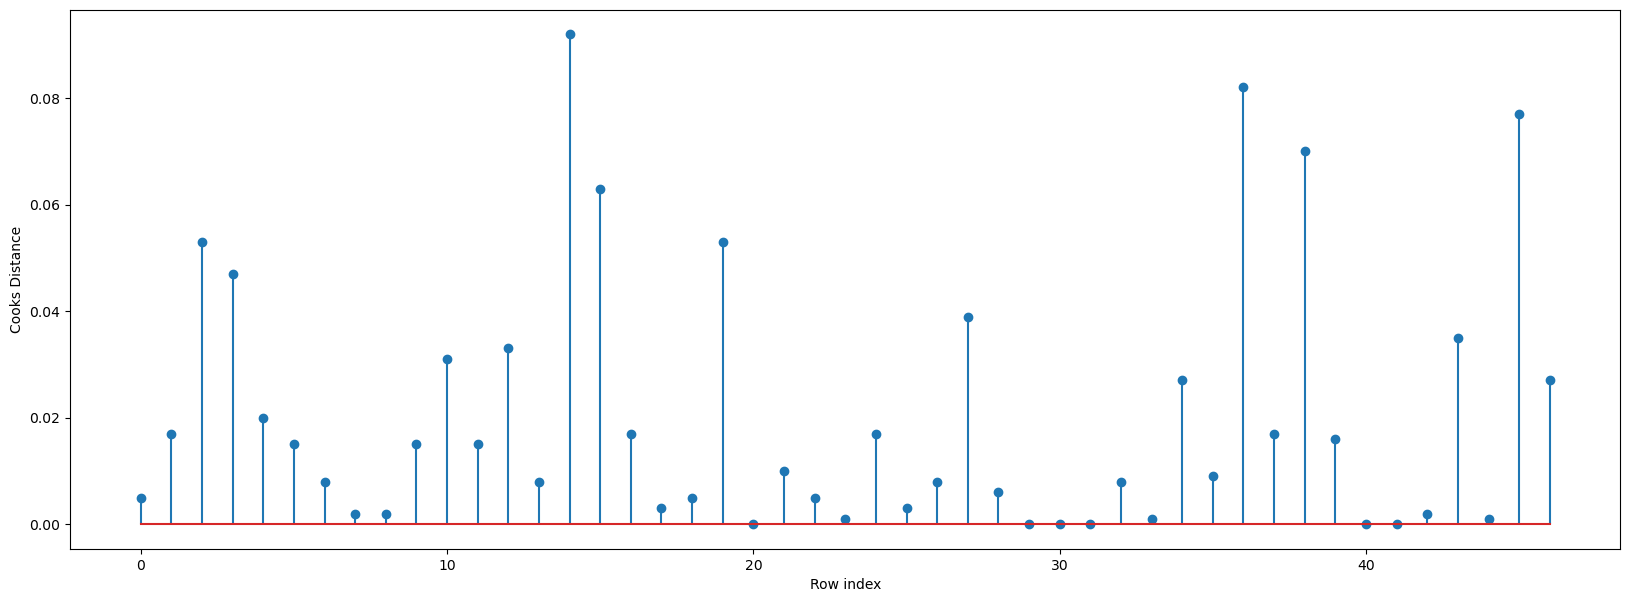

In [46]:
#Plot the Influencers Values using Stem Plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
df_2=df1.copy()

#### Removing Influencial Points

In [48]:
df2=df_2.drop(df_2.index[[2,3,10,12,14,15,19,27,36,38,43,45]],axis=0).reset_index()

In [49]:
df2=df2.drop(['index'],axis=1)


In [50]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,142107.34,91391.77,366168.42,166187.94,0,0,1
3,131876.90,99814.71,362861.36,156991.12,1,0,0
4,134615.46,147198.87,127716.82,156122.51,0,1,0


In [51]:
model_df2= smf.ols('Profit~Q("R&D Spend")+Administration+Q("Marketing Spend")+ NewYork_State+California_State+Florida_State', data=df2).fit()

In [52]:
model_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     462.4
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.03e-26
Time:                        13:00:56   Log-Likelihood:                -337.97
No. Observations:                  35   AIC:                             687.9
Df Residuals:                      29   BIC:                             697.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.547e+04   2883.255     12.302      0.000    2.96e+04    4.14e+04
Q("R&D Spend")           0.7626      0.029     26.048      0.000       0.703       0.823
Administration          -0.0043      0.028     -0.157      0.877      -0.061       0.052
Q("Marketing Spend")     0.0399      0.010      3.804      0.001       0.018       0.061
NewYork_State         1.067e+04   1620.898      6.580      0.000    7349.951     1.4e+04
California_State      1.453e+04   1203.997     12.067      0.000    1.21e+04     1.7e+04
Florida_State         1.028e+04   1408.594      7.295      0.000    7394.501    1.32e+04
==============================================================================
Omnibus:                        1.050   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                1.068
Skew:                           0.340   Prob(JB):                        0.586
Kurtosis:                       2.480   Cond. No.                     3.44e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""